# Maximizing Revenue for Taxi Cab Driver through Payment Type Analysis

### Problem Statement

In the fast paced taxing booking sector, making the most of revenue is essential for long-term success & driver happiness. Our goal is to use data driven insights to maximize revenue streams for taxi drivers in order to meet this need. Our research aims to determine whether payment methods have impact on fair pricing by focusing on the relationship between payment type & fare amount.

### Objective

This project's main goal is to run an A/B test to examine the relationship between the total fare & the method of payment. We use Python hypothesis testing & descriptive statistics to extract useful information that can help taxi drivers generate more income. In particular we want to find out if there is a big difference in the fares for those who pay with credit cards v/s those who pay with cash.

### Research Question

Is there a relationship between total fare amount & payment type & can we nudge customer towards payment methods that generate higher revenue for drivers, without negatively impacting customer experience?

## 1. Importing Libraries

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

## 2. Loading the dataset

In [12]:
df = pd.read_csv("taxi_trip.csv")
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,01-01-2020 00:28,01-01-2020 00:33,1,1.2,1,N,238,239,1,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1,01-01-2020 00:35,01-01-2020 00:43,1,1.2,1,N,239,238,1,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1,01-01-2020 00:47,01-01-2020 00:53,1,0.6,1,N,238,238,1,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1,01-01-2020 00:55,01-01-2020 01:00,1,0.8,1,N,238,151,1,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2,01-01-2020 00:01,01-01-2020 00:04,1,0.0,1,N,193,193,2,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


## 3. EDA

In [13]:
df.shape

(1048575, 18)

In [14]:
df.dtypes

VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
RatecodeID                 int64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

In [15]:
try:
    df["tpep_pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"], dayfirst=True)
    df["tpep_dropoff_datetime"] = pd.to_datetime(df["tpep_dropoff_datetime"], dayfirst=True)
    print("Datetime conversion successful.")
except Exception as e:
    print("Error in datetime conversion:", e)

print("Data Types After Conversion:")
print(df[["tpep_pickup_datetime", "tpep_dropoff_datetime"]].dtypes)

Datetime conversion successful.
Data Types After Conversion:
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
dtype: object


- The try-except block ensures that if there is an error during the datetime conversion (e.g., due to incorrect format), it will be caught and printed without crashing the program.
- After conversion, checking the data types confirms that the specified columns have been successfully converted to datetime64[ns]. This is essential for time-based analysis and calculations.

In [16]:
# Ensure that datetime conversion was successful before calculating duration
if "tpep_pickup_datetime" in df.columns and "tpep_dropoff_datetime" in df.columns:
    df["duration"] = df["tpep_dropoff_datetime"] - df["tpep_pickup_datetime"]
    df["duration"] = df["duration"].dt.total_seconds() / 60
    print("Duration calculation successful.")
else:
    print("Datetime columns are missing. Cannot calculate duration.")

# Display the first 5 rows to check the result
df[:5]

Duration calculation successful.


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration
0,1,2020-01-01 00:28:00,2020-01-01 00:33:00,1,1.2,1,N,238,239,1,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5,5.0
1,1,2020-01-01 00:35:00,2020-01-01 00:43:00,1,1.2,1,N,239,238,1,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5,8.0
2,1,2020-01-01 00:47:00,2020-01-01 00:53:00,1,0.6,1,N,238,238,1,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5,6.0
3,1,2020-01-01 00:55:00,2020-01-01 01:00:00,1,0.8,1,N,238,151,1,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0,5.0
4,2,2020-01-01 00:01:00,2020-01-01 00:04:00,1,0.0,1,N,193,193,2,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0,3.0


In [17]:
# Filter to keep only relevant columns
df = df[["passenger_count", "payment_type", "fare_amount", "trip_distance", "duration"]]
df[:5]

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,1,6.0,1.2,5.0
1,1,1,7.0,1.2,8.0
2,1,1,6.0,0.6,6.0
3,1,1,5.5,0.8,5.0
4,1,2,3.5,0.0,3.0


In [18]:
df.isnull().sum()

passenger_count    0
payment_type       0
fare_amount        0
trip_distance      0
duration           0
dtype: int64

Percentage of data containing null values = [null_value_counts / len(df)] * 100

Remove any rows in a dataframe that contain missing values: df.dropna(inplace=True)

To convert float dtype to int dtype: df["passenger_count"] = df["passenger_count"].astype("int64")

In [19]:
duplicates = df[df.duplicated()]

num_duplicates = duplicates.shape[0]
num_duplicates

767744

In [20]:
# Check the number of rows before dropping duplicates
print("Shape before dropping duplicates:", df.shape)

# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Check the number of rows after dropping duplicates
print("Shape after dropping duplicates:", df.shape)

Shape before dropping duplicates: (1048575, 5)
Shape after dropping duplicates: (280831, 5)


In [21]:
# Percentage of each passenger count category
passenger_count_distribution = df["passenger_count"].value_counts(normalize=True)
passenger_count_distribution

passenger_count
1    0.498788
2    0.206594
3    0.087522
5    0.074632
4    0.059189
6    0.050974
0    0.022230
7    0.000036
8    0.000021
9    0.000014
Name: proportion, dtype: float64

In [22]:
# Percentage share of each payment type
payment_type_distribution = df["payment_type"].value_counts(normalize=True)
print("Payment Type Distribution:\n", payment_type_distribution)

Payment Type Distribution:
 payment_type
1    0.598128
2    0.379306
3    0.013296
4    0.009269
Name: proportion, dtype: float64


In [23]:
# Filter payment types and passenger counts
df = df[(df["payment_type"] < 3) & (df["passenger_count"] > 0) & (df["passenger_count"] < 6)]

# Output the shape of the DataFrame after filtering
print("DataFrame shape after filtering:", df.shape)

DataFrame shape after filtering: (254311, 5)


In [24]:
df.shape

(254311, 5)

In [25]:
df["payment_type"] = df["payment_type"].replace({1: "Card", 2: "Cash"})
df[:5]

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,Card,6.0,1.2,5.0
1,1,Card,7.0,1.2,8.0
2,1,Card,6.0,0.6,6.0
3,1,Card,5.5,0.8,5.0
4,1,Cash,3.5,0.0,3.0


## 4. Data Visualization

In [26]:
df.describe()

,passenger_count,fare_amount,trip_distance,duration
count,254311.000000,254311.000000,254311.000000,254311.000000
mean,1.934462,23.757477,6.680553,33.970591
std,1.273179,18.712789,6.081747,133.525464
min,1.000000,-500.000000,-22.180000,-2770.000000
25%,1.000000,11.500000,2.230000,12.000000
50%,1.000000,18.000000,4.550000,19.000000
75%,2.000000,31.000000,9.380000,28.000000
max,5.000000,1238.000000,259.220000,4168.000000


In [27]:
print("Original DataFrame shape:", df.shape)
# Perform filtering
df = df[df["fare_amount"] > 0]
df = df[df["trip_distance"] > 0]
df = df[df["duration"] > 0]
print("Filtered DataFrame shape:", df.shape)

Original DataFrame shape: (254311, 5)
Filtered DataFrame shape: (250166, 5)


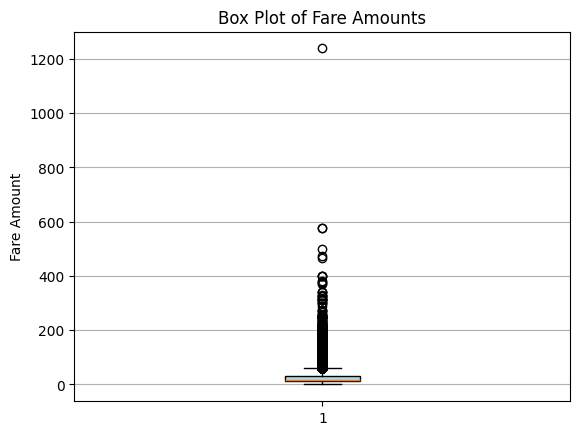

In [28]:
plt.boxplot(df["fare_amount"], patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title("Box Plot of Fare Amounts")
plt.ylabel("Fare Amount")
plt.grid(axis='y')
plt.show()

In [29]:
def remove_outliers(df, cols):
    for col in cols:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lb = q1 - 1.5 * iqr
        ub = q3 + 1.5 * iqr
        df = df[(df[col] >= lb) & (df[col] <= ub)]
    return df

df = remove_outliers(df, ["fare_amount", "trip_distance", "duration"])

In [30]:
df.shape

(228074, 5)

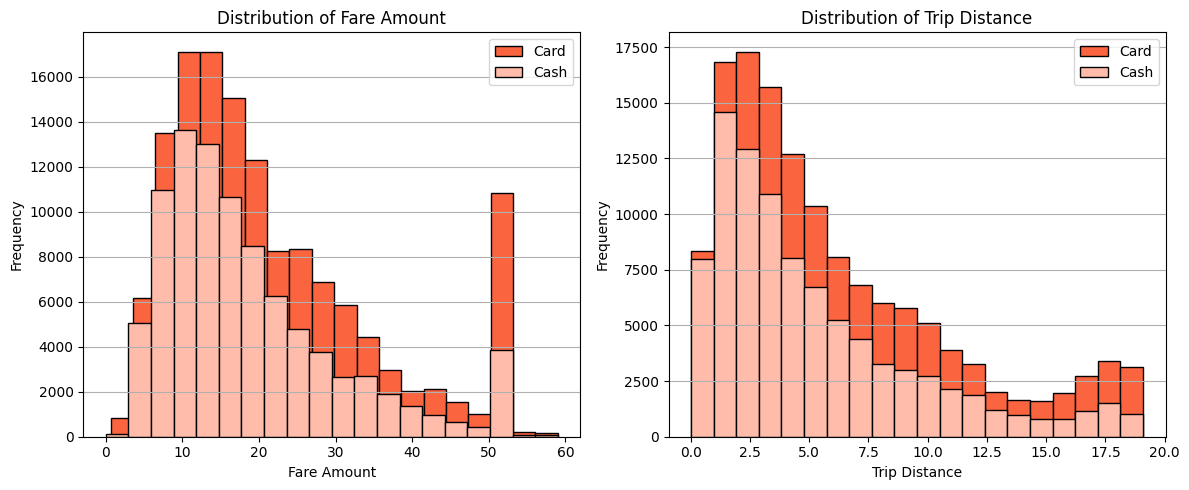

In [31]:
plt.figure(figsize=(12, 5))

# Subplot for Fare Amount Distribution
plt.subplot(1, 2, 1)
plt.title("Distribution of Fare Amount")
plt.xlabel("Fare Amount")
plt.ylabel("Frequency")
plt.hist(df[df["payment_type"] == "Card"]["fare_amount"], 
         histtype="barstacked", bins=20, edgecolor="k", color="#FA643F", label="Card")
plt.hist(df[df["payment_type"] == "Cash"]["fare_amount"], 
         histtype="barstacked", bins=20, edgecolor="k", color="#FFBCAB", label="Cash")
plt.legend()
plt.grid(axis='y')

# Subplot for Trip Distance Distribution
plt.subplot(1, 2, 2)
plt.title("Distribution of Trip Distance")
plt.xlabel("Trip Distance")
plt.ylabel("Frequency")
plt.hist(df[df["payment_type"] == "Card"]["trip_distance"], 
         histtype="barstacked", bins=20, edgecolor="k", color="#FA643F", label="Card")
plt.hist(df[df["payment_type"] == "Cash"]["trip_distance"], 
         histtype="barstacked", bins=20, edgecolor="k", color="#FFBCAB", label="Cash")
plt.legend()
plt.grid(axis='y')

plt.tight_layout()
plt.show()

In [32]:
# Group by payment_type and calculate mean and standard deviation for fare_amount and trip_distance
payment_stats = df.groupby("payment_type").agg({
    "fare_amount": ["mean", "std"], 
    "trip_distance": ["mean", "std"]
})

payment_stats

fare_amount            trip_distance          
                    mean        std          mean       std
payment_type                                               
Card           21.674544  13.285944      6.091676  4.797795
Cash           18.745741  11.755330      5.171730  4.342421

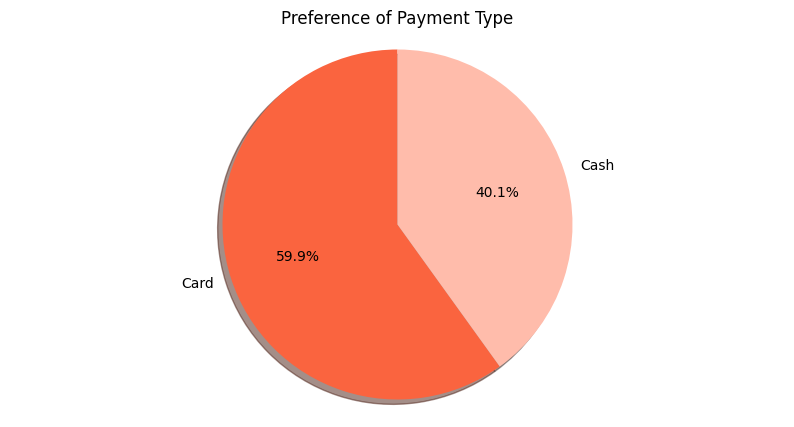

In [33]:
plt.figure(figsize=(10, 5))
plt.title("Preference of Payment Type")
plt.pie(
    df["payment_type"].value_counts(normalize=True),
    labels=df["payment_type"].value_counts().index,
    startangle=90,
    shadow=True,
    autopct="%1.1f%%",
    colors=["#FA643F", "#FFBCAB"]
)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [34]:
passenger_count = df.groupby(["payment_type", "passenger_count"]).size().reset_index(name='count')

In [35]:
passenger_count["perc"] = (passenger_count["count"] / passenger_count["count"].sum()) * 100
passenger_count

,payment_type,passenger_count,count,perc
0,Card,1,71100,31.174093
1,Card,2,31203,13.681086
2,Card,3,13462,5.902470
3,Card,4,8557,3.751852
4,Card,5,12368,5.422801
5,Cash,1,48351,21.199698
6,Cash,2,20053,8.792322
7,Cash,3,9017,3.953541
8,Cash,4,6572,2.881521
9,Cash,5,7391,3.240615


In [36]:
# Create an empty DataFrame with the specified columns
df = pd.DataFrame(columns=["payment_type", 1, 2, 3, 4, 5])

# Assign payment types
df["payment_type"] = ["Card", "Cash"]

# Extract the percentage values for each payment type
card_perc = passenger_count[passenger_count["payment_type"] == "Card"]["perc"].values
cash_perc = passenger_count[passenger_count["payment_type"] == "Cash"]["perc"].values

# Assign percentages to the corresponding rows
df.iloc[0, 1:] = card_perc  
df.iloc[1, 1:] = cash_perc  
df

,payment_type,1,2,3,4,5
0,Card,31.174093,13.681086,5.90247,3.751852,5.422801
1,Cash,21.199698,8.792322,3.953541,2.881521,3.240615


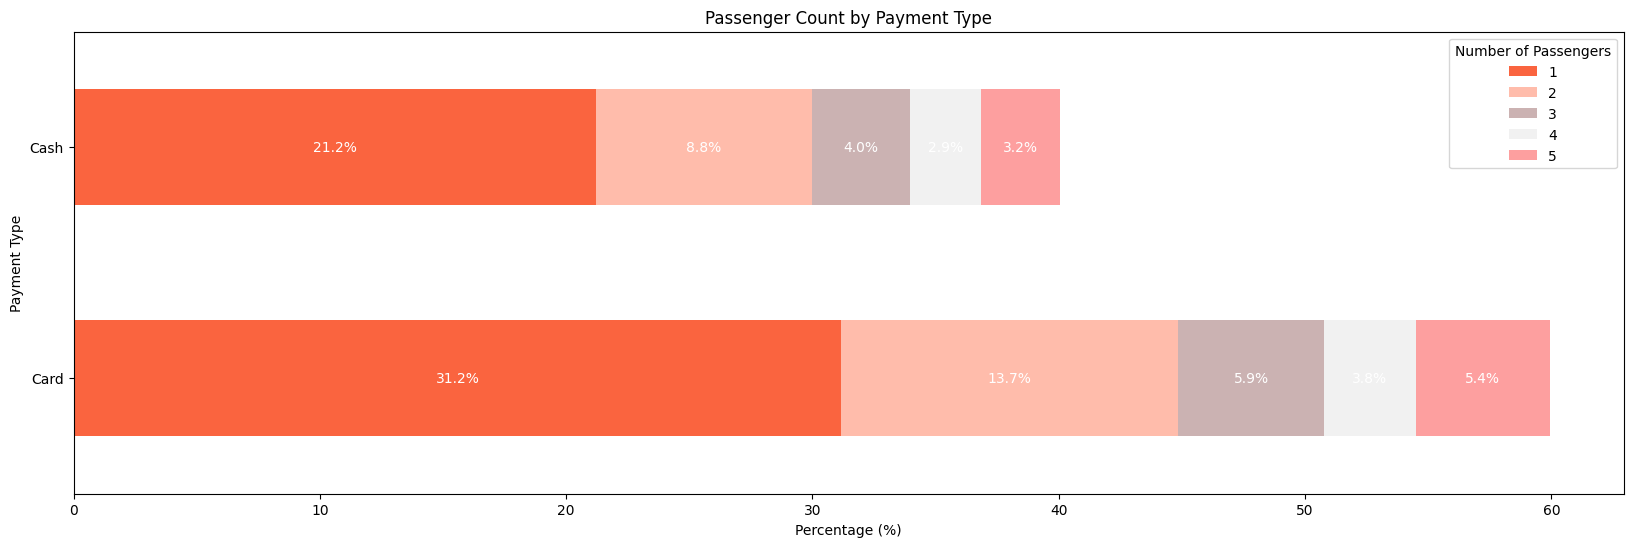

In [38]:
# Create the DataFrame for plotting based on the passenger_count data
df_plot = pd.DataFrame(columns=["payment_type", 1, 2, 3, 4, 5])
df_plot["payment_type"] = ["Card", "Cash"]
df_plot.iloc[0, 1:] = passenger_count.iloc[0:5, -1]
df_plot.iloc[1, 1:] = passenger_count.iloc[5:, -1]

fig, ax = plt.subplots(figsize=(20, 6))

# Set the payment_type as the index for proper plotting
df_plot.set_index("payment_type").plot(kind="barh", stacked=True,
                                        color=["#FA643F", "#FFBCAB", "#CBB2B2", "#F1F1F1", "#FD9F9F"],
                                        ax=ax)

# Annotating the bars with percentages
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()  # Get the x and y coordinates of the rectangle
    ax.text(x + width / 2, y + height / 2, "{:.1f}%".format(width), 
            horizontalalignment="center", verticalalignment="center", color="white")

plt.title("Passenger Count by Payment Type")
plt.xlabel("Percentage (%)")
plt.ylabel("Payment Type")
plt.legend(title="Number of Passengers")
plt.show()

**Null Hypothesis**: There's no difference in average fare between customers who use credit cards & customers who use cash.

**Alternate Hypothesis**: There's difference in average fare between customers who use credit cards & customers who use cash.

In [39]:
import statsmodels.api as sm

In [42]:
df = pd.read_csv("taxi_trip.csv")

df['fare_amount'] = pd.to_numeric(df['fare_amount'], errors='coerce')

# Filter dataset for only payment types 1 (Card) and 2 (Cash)
df = df[df["payment_type"].isin([1, 2])]

df["payment_type"] = df["payment_type"].replace({1: "Card", 2: "Cash"})

# Remove invalid 'fare_amount' rows (e.g., NaN values)
df = df[df['fare_amount'].notna()]

# Isolate the 'fare_amount' for Card and Cash payment types
card_fare = df[df["payment_type"] == "Card"]["fare_amount"]
cash_fare = df[df["payment_type"] == "Cash"]["fare_amount"]

# Print sample sizes for Card and Cash payments
print("Card Fare Size:", card_fare.count())
print("Cash Fare Size:", cash_fare.count())

print(f"Card Fare Mean: {card_fare.mean():.2f}, Std Dev: {card_fare.std():.2f}")
print(f"Cash Fare Mean: {cash_fare.mean():.2f}, Std Dev: {cash_fare.std():.2f}")

# Perform t-test if samples are non-empty
if not card_fare.empty and not cash_fare.empty:
    t_stat, p_value = st.ttest_ind(card_fare, cash_fare, equal_var=False)
    print(f"T-Statistic: {t_stat:.4f}, P-Value: {p_value:.4e}")
else:
    print("One or both samples are empty; cannot perform t-test.")

Card Fare Size: 717127
Cash Fare Size: 322070
Card Fare Mean: 13.26, Std Dev: 13.15
Cash Fare Mean: 12.40, Std Dev: 12.13
T-Statistic: 32.6696, P-Value: 6.4771e-234


**1. Sample Sizes:**
- Card Fare Size: 717,127 samples for Card payment method indicate a large dataset, providing robust statistical power for analysis.
- Cash Fare Size: 322,070 samples for Cash payment method, while smaller, is still substantial enough to conduct meaningful comparisons.

**2. Mean Fare Amount:**
- Card Fare Mean: \$13.26 indicates that, on average, trips paid with a card are slightly more expensive than those paid in cash.
- Cash Fare Mean: \$12.40 suggests that cash payments result in lower average fare amounts compared to card payments.

**3. Standard Deviation:**
- Card Fare Std Dev: \$13.15 reflects a high variability in the fare amounts paid by card, indicating that there are significant differences in fare amounts among the trips.
- Cash Fare Std Dev: \$12.13 shows variability in cash fares as well, but it is slightly lower than that of card fares.

**4. Statistical Significance:**
- T-Statistic: 32.6696 indicates a very strong difference between the two groups' means. A high t-statistic suggests that the means of the two groups (Card vs. Cash) are significantly different.
- P-Value: 6.4771e-234 is an extremely small p-value, which is far below any conventional significance threshold (e.g., 0.05 or 0.01). This indicates strong evidence against the null hypothesis that there is no difference between the means of the two groups. Therefore, it can be concluded that the difference in average fare amounts between card and cash payments is statistically significant.

**5. Conclusion:**
- Based on the analysis, it appears that trips paid with a card tend to have a higher average fare compared to those paid with cash. The statistical tests confirm that this difference is significant, suggesting that payment type may influence fare amounts in this dataset.

## Insights

**1. Incentivize Card Payments:**

1. Discounts or Promotions: Offer a small discount or promotional offer for customers who choose to pay with a Card. For example, a discount on their next ride or a loyalty program that provides points for Card payments can motivate users.
2. Cashback Offers: Partner with banks or financial institutions to offer cashback rewards for customers who use their cards for payment.

**2. Enhance Convenience:**

1. Simplify the Payment Process: Ensure that the Card payment process is seamless and user-friendly. Implement features like quick tap payments, auto-fill for payment details, or mobile wallets that facilitate faster transactions.
2. In-app Payment Options: For ride-hailing apps, encourage users to link their payment methods in-app to streamline the payment process, reducing the need to handle cash.